In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [2]:
train = pd.read_csv("../datasets/titanic/train.csv")


In [3]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.corr()["Survived"].sort_values()


/tmp/ipykernel_590787/718193493.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()['Survived'].sort_values()


Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

In [5]:
# For testing purpose, I want 2 continuous data, age and fare
train = train[["Age", "Fare"]]


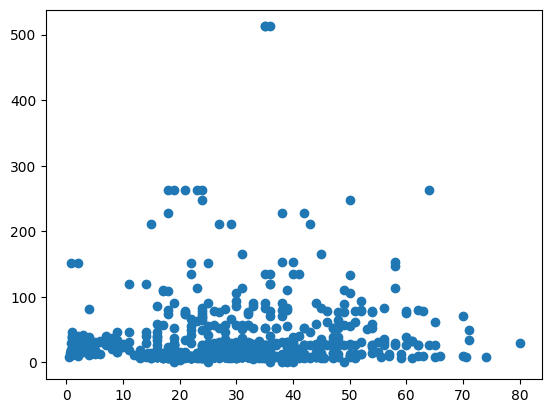

In [6]:
fig, ax = plt.subplots()

ax = plt.scatter(train["Age"], train["Fare"])


In [38]:
# Set the number of desired cluster to 2
# run the k-means clustering algorithms 10 times independently with random centroids
# to choose the final models as the one with lowest SSE
# max_iter will be the maximum number of iterations of each single run

# k-means implementation in scikit-learn stops early if it converges
# before the maximum number of iterations is reached

# choose large value of tol - the parameter controls the tolerance with regard to the changes

km = KMeans(
    n_clusters=2, init="random", n_init=10, max_iter=300, tol=1e-04, random_state=0
)


train["Age"] = train["Age"].fillna(train["Age"].mean())
train["Fare"] = train["Fare"].fillna(train["Fare"].mean())


# Predict the cluster labels y_km
y_km = km.fit_predict(train)


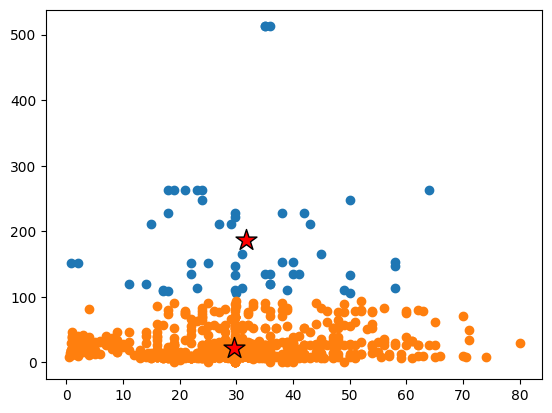

In [56]:
fig, ax = plt.subplots()

# Plot the different clusters in different scatters
ax = plt.scatter(train['Age'][y_km == 0], train['Fare'][y_km == 0])

ax = plt.scatter(train['Age'][y_km == 1], train['Fare'][y_km == 1])

# Plot the cluster center
ax = plt.scatter(
    km.cluster_centers_[:, 0],
    km.cluster_centers_[:, 1],
    s=250,
    marker="*",
    c="red",
    edgecolor="black",
    label="centroids",
)


In [50]:
train[y_km == 0]

,Age,Fare
27,19.000000,263.0000
31,29.699118,146.5208
88,23.000000,263.0000
118,24.000000,247.5208
195,58.000000,146.5208
215,31.000000,113.2750
258,35.000000,512.3292
268,58.000000,153.4625
269,35.000000,135.6333
297,2.000000,151.5500
